## 1. Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## 2. Import Data

In [2]:
data=pd.read_csv('Mall_Customers.csv')

## 3. EDA Basic checks

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.shape

(200, 5)

In [5]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 4. checking data validation - duplicate/null analysis

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 5. Univariate analysis

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# customerid is unique so we are droping for further analysis
data.drop('CustomerID',axis=1,inplace=True)

In [10]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
data=data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})

In [12]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 5.1 Visulization of Data

In [13]:
corr=data.corr()

Text(0.5, 1.0, 'Heatmap of the data')

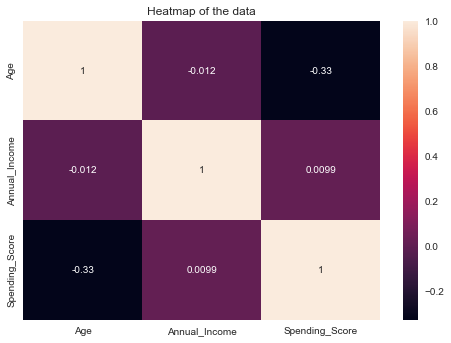

In [14]:
sns.heatmap(corr,annot=True)
plt.title('Heatmap of the data')

In [15]:
# gender analysis
labels=data['Gender'].unique()

In [16]:
labels

array(['Male', 'Female'], dtype=object)

In [17]:
values=data['Gender'].value_counts(ascending=True)

In [18]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

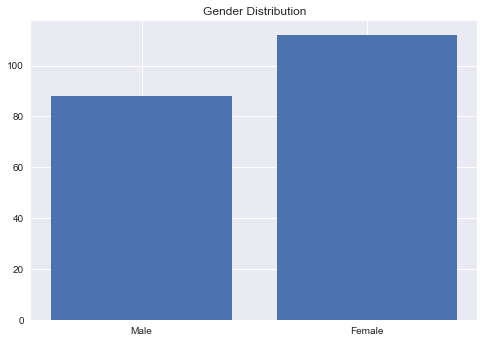

In [19]:
plt.bar(x=labels,height=values)
plt.title('Gender Distribution')

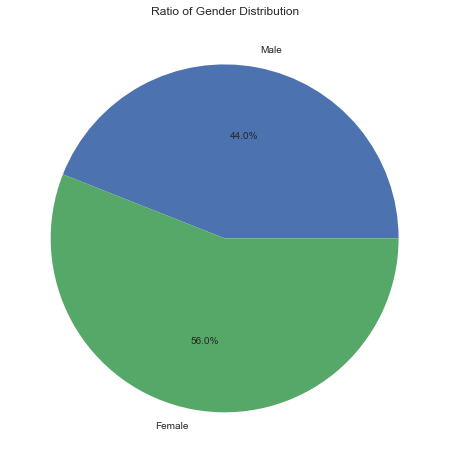

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(values,labels=labels,autopct='%1.1f%%')
ax.set(title='Ratio of Gender Distribution')
plt.show()

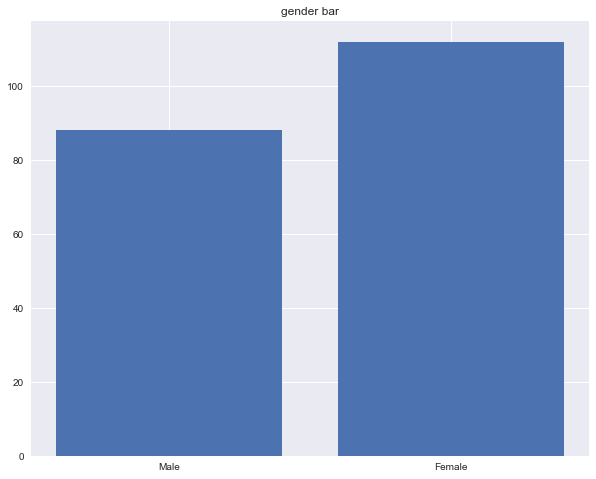

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x=labels,height=values)
ax.set(title='gender bar')
plt.show()

Text(0.5, 1.0, 'Scatter plot between Annual Income and Spending score')

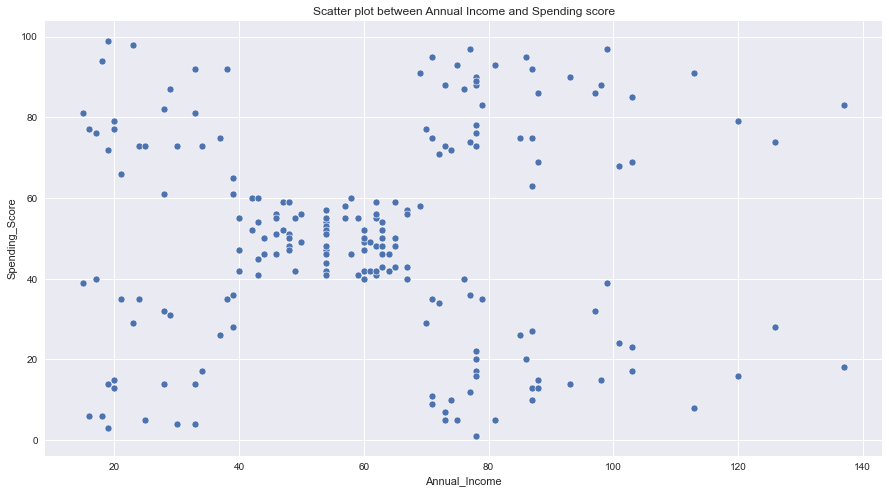

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Annual_Income',y='Spending_Score',data=data)
plt.title('Scatter plot between Annual Income and Spending score')

In [24]:
X=data[['Annual_Income','Spending_Score','Age']]

In [25]:
X

,Annual_Income,Spending_Score,Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [26]:
from sklearn.cluster import KMeans

In [27]:
acc=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(X)
    acc.append(km.inertia_)
    

C:\Users\He336\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\He336\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\He336\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\He336\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

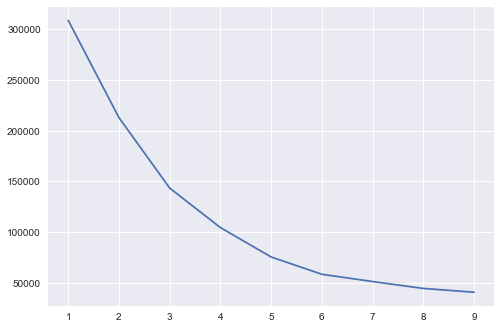

In [28]:
plt.plot(range(1,10),acc)


In [29]:
# taking 5 clusters
km1=KMeans(n_clusters=5)
km1.fit(X)

C:\Users\He336\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [33]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,label
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


In [34]:
data['label'].value_counts()

3    79
2    39
1    36
0    23
4    23
Name: label, dtype: int64

In [30]:
y=km1.predict(X)

In [32]:
data['label']=y

In [35]:
data.head(100)

,Gender,Age,Annual_Income,Spending_Score,label
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0
...,...,...,...,...,...
95,Male,24,60,52,3
96,Female,47,60,47,3
97,Female,27,60,50,3
98,Male,48,61,42,3


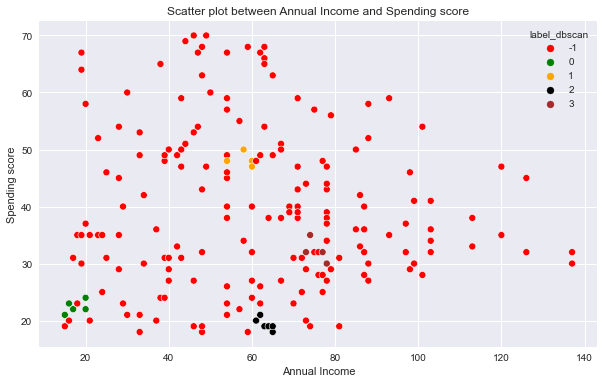

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual_Income',y='Age',data=data,hue='label_dbscan',palette=['red','green','orange','black','brown'])
plt.title('Scatter plot between Annual Income and Spending score')
plt.ylabel('Spending score')
plt.xlabel('Annual Income')
plt.show()

## Hierarchical Clustering

In [52]:
from  sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_hc=hc.fit_predict(X)

In [53]:
data['label_hc']=Y_hc

In [89]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,label,label_hc,label_dbscan
0,Male,19,15,39,0,4,-1
1,Male,21,15,81,4,3,0
2,Female,20,16,6,0,4,-1
3,Female,23,16,77,4,3,0
4,Female,31,17,40,0,4,-1


In [55]:
data['label_hc'].value_counts()

0    83
2    39
1    35
4    23
3    20
Name: label_hc, dtype: int64

## Dendogram graph

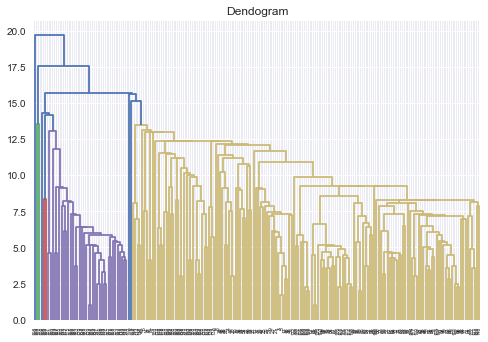

In [59]:
import  scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(X))
plt.title('Dendogram')
plt.show()

## DBSCAN algorithm

In [64]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,label,label_hc,label_hc1
0,Male,19,15,39,0,4,AgglomerativeClustering(n_clusters=5)
1,Male,21,15,81,4,3,AgglomerativeClustering(n_clusters=5)
2,Female,20,16,6,0,4,AgglomerativeClustering(n_clusters=5)
3,Female,23,16,77,4,3,AgglomerativeClustering(n_clusters=5)
4,Female,31,17,40,0,4,AgglomerativeClustering(n_clusters=5)


In [65]:
data.drop('label_hc1',axis=1,inplace=True)

In [66]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,label,label_hc
0,Male,19,15,39,0,4
1,Male,21,15,81,4,3
2,Female,20,16,6,0,4
3,Female,23,16,77,4,3
4,Female,31,17,40,0,4


In [83]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=5)

In [84]:
dbscan_y=dbscan.fit_predict(X)

In [85]:
data['label_dbscan']=dbscan_y

In [86]:
data['label_dbscan'].value_counts()

-1    179
 2      6
 0      5
 1      5
 3      5
Name: label_dbscan, dtype: int64

In [88]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,label,label_hc,label_dbscan
0,Male,19,15,39,0,4,-1
1,Male,21,15,81,4,3,0
2,Female,20,16,6,0,4,-1
3,Female,23,16,77,4,3,0
4,Female,31,17,40,0,4,-1
